In [31]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale
from skimage.transform import iradon

def radtra(file):
    image = imread( file, as_grey=True)
    #image = rescale(image, scale=0.4, mode='reflect')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.set_title("Original")
    ax1.imshow(image, cmap=plt.cm.Greys_r)

    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta, circle=True)
    ax2.set_title("Radon transform\n(Sinogram)")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.set_ylabel("Projection position (pixels)")
    ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

    fig.tight_layout()
    plt.show()
    reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
    error = reconstruction_fbp - image
    #error= 2
    print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error**2)))

    imkwargs = dict(vmin=-0.2, vmax=0.2)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                                   sharex=True, sharey=True,
                                   subplot_kw={'adjustable': 'box-forced'})
    ax1.set_title("Reconstruction\nFiltered back projection")
    ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
    ax2.set_title("Reconstruction error\nFiltered back projection")
    ax2.imshow(image, cmap=plt.cm.Greys_r, **imkwargs)
    plt.show()
    

images/img_10002432.png


C:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:66: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


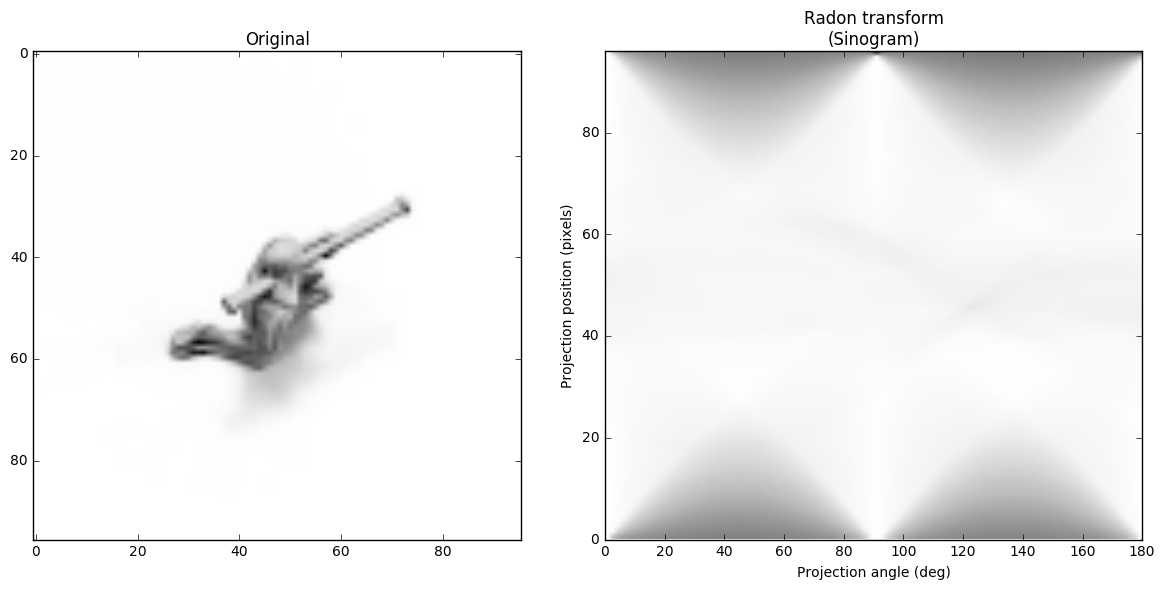

FBP rms reconstruction error: 135


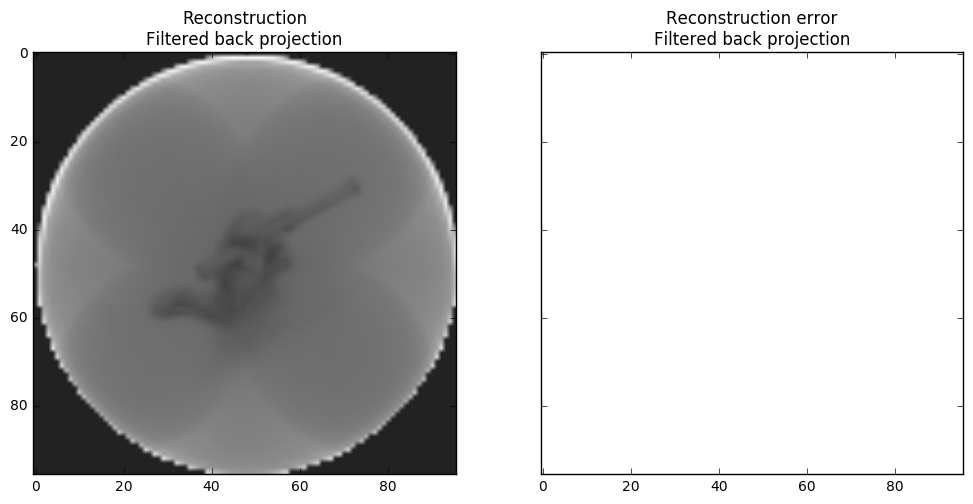

images/img_10005504.png


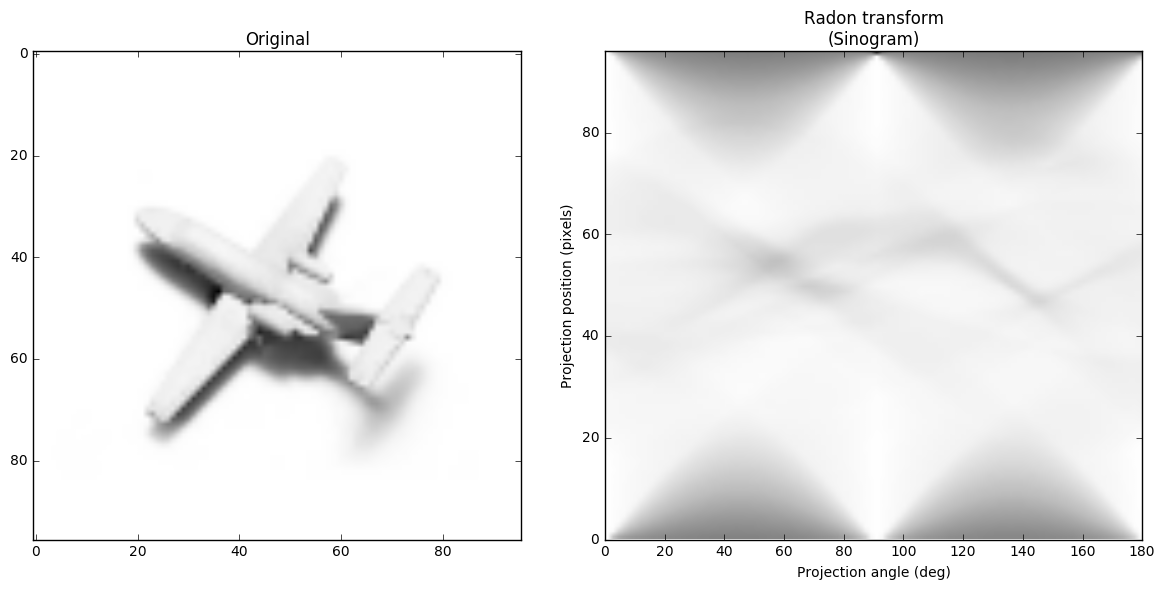

FBP rms reconstruction error: 111


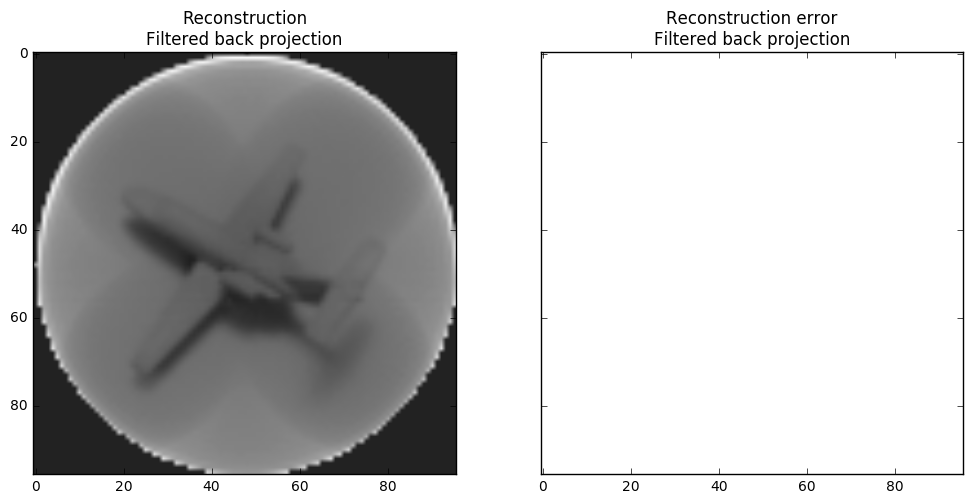

images/img_10008576.png


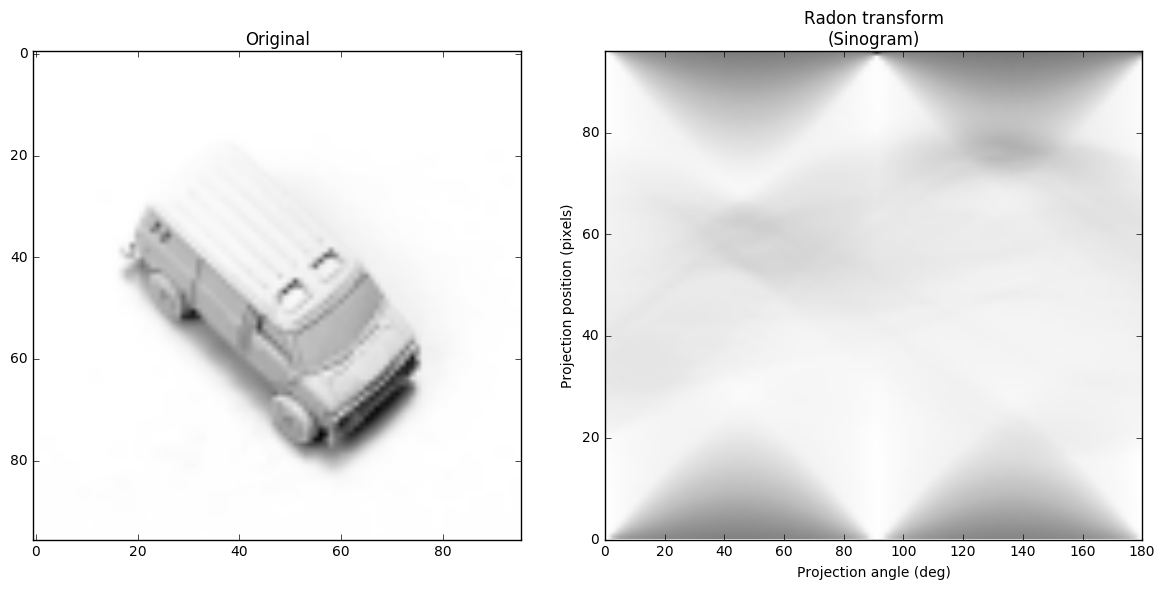

FBP rms reconstruction error: 121


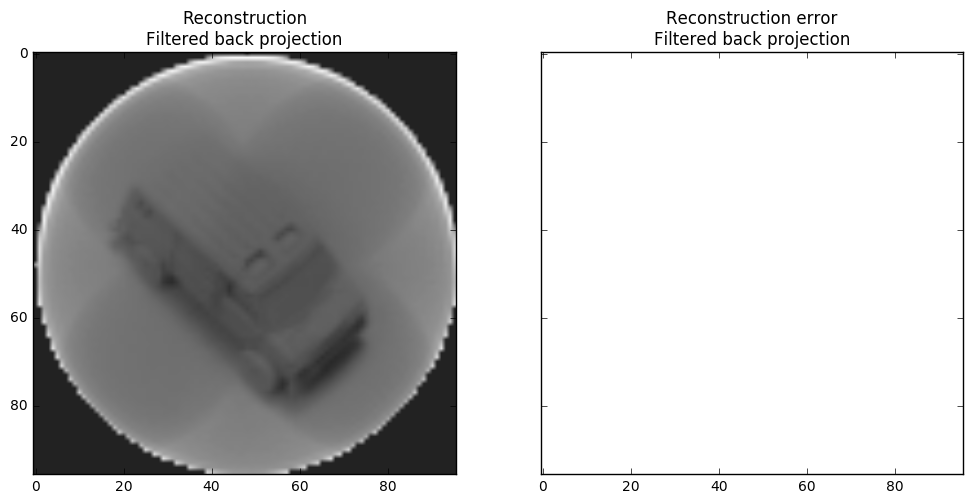

images/img_10011648.png


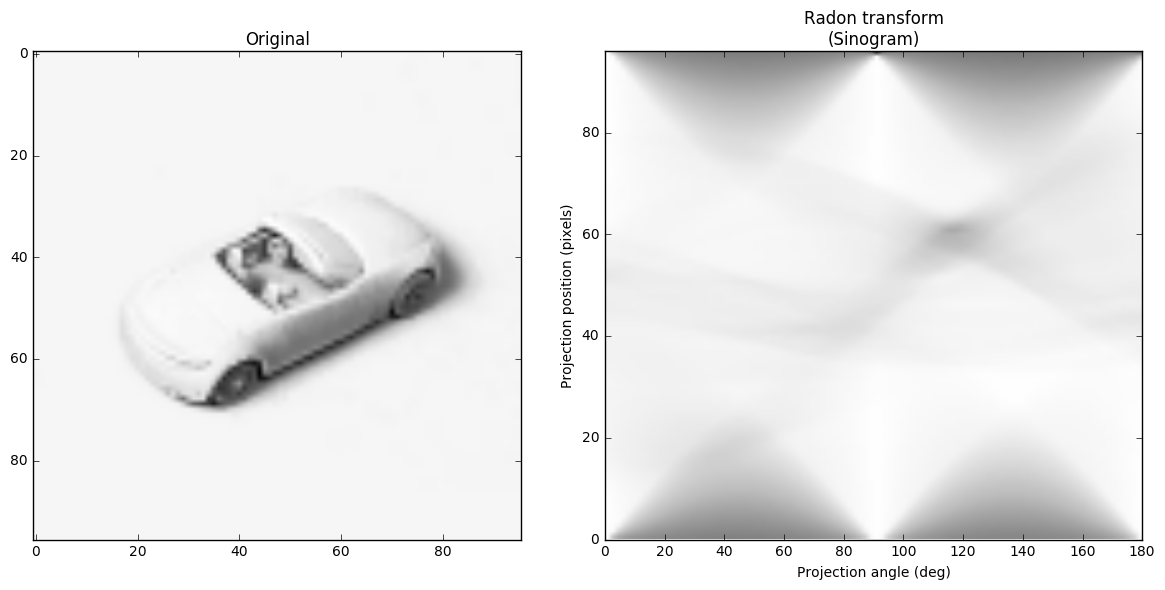

FBP rms reconstruction error: 75.6


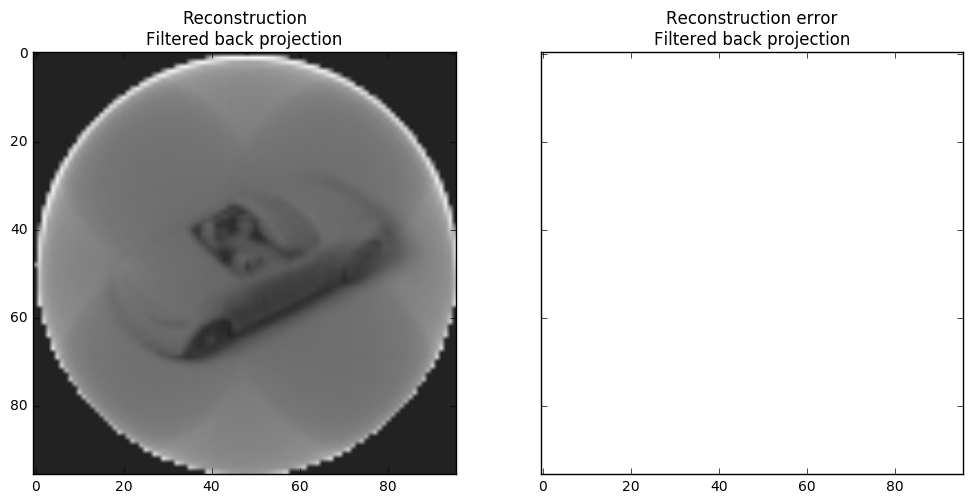

images/img_1001472.png


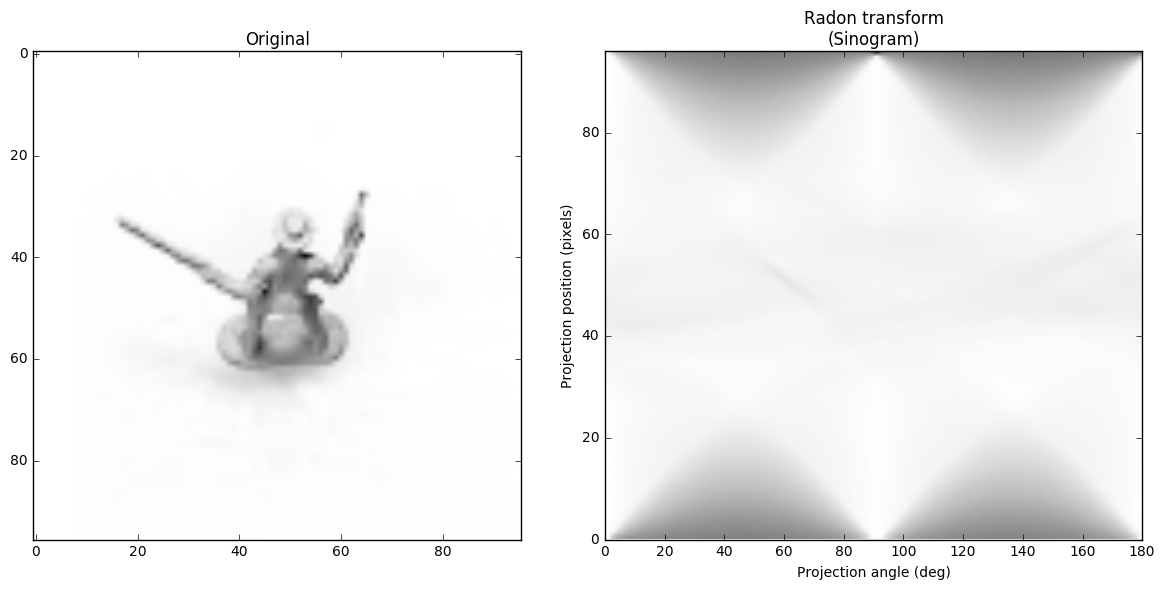

FBP rms reconstruction error: 125


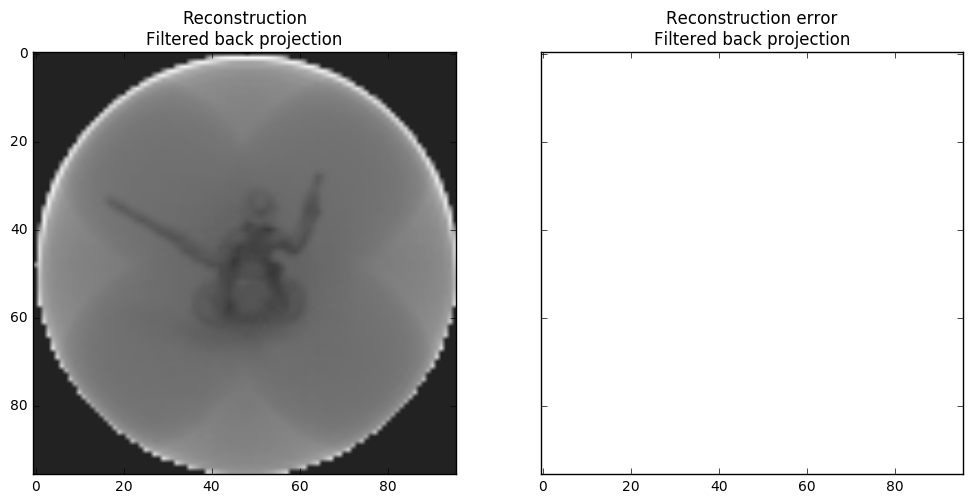

images/img_10014720.png


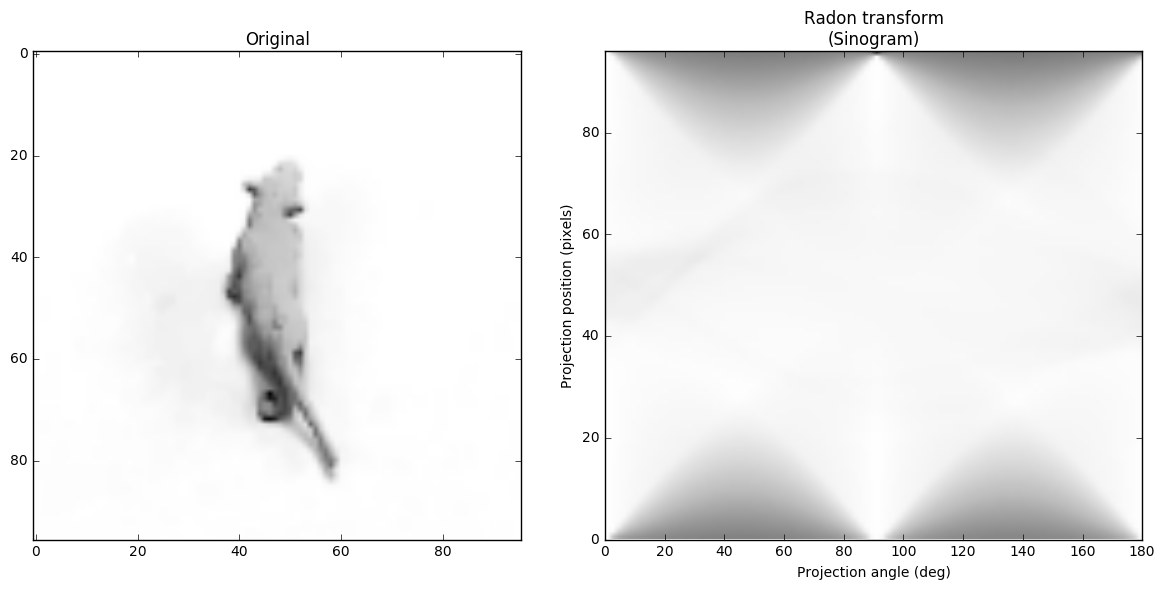

FBP rms reconstruction error: 136


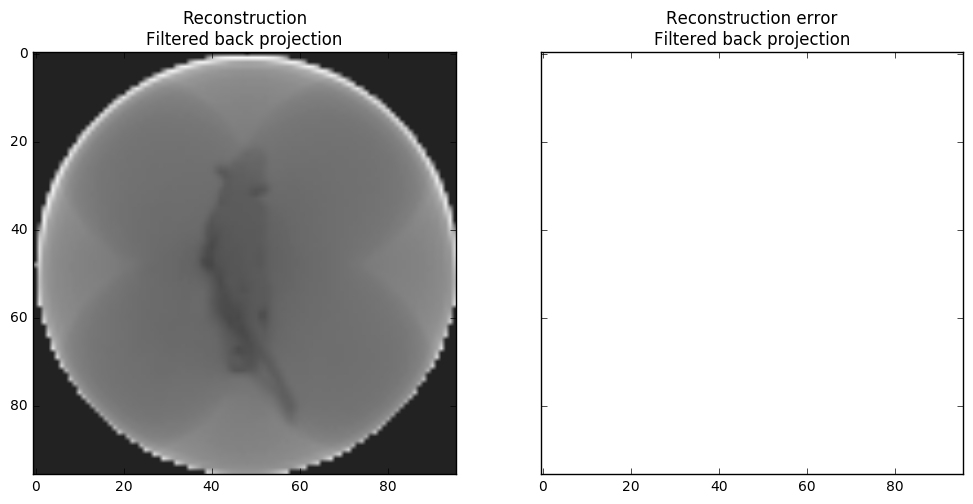

images/img_10017792.png


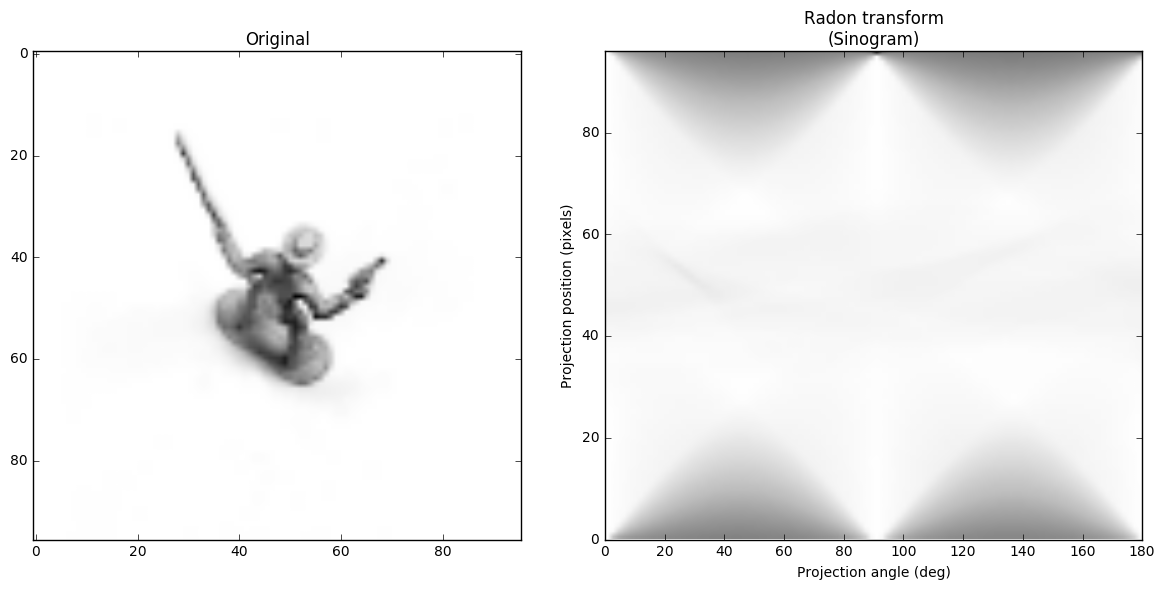

FBP rms reconstruction error: 137


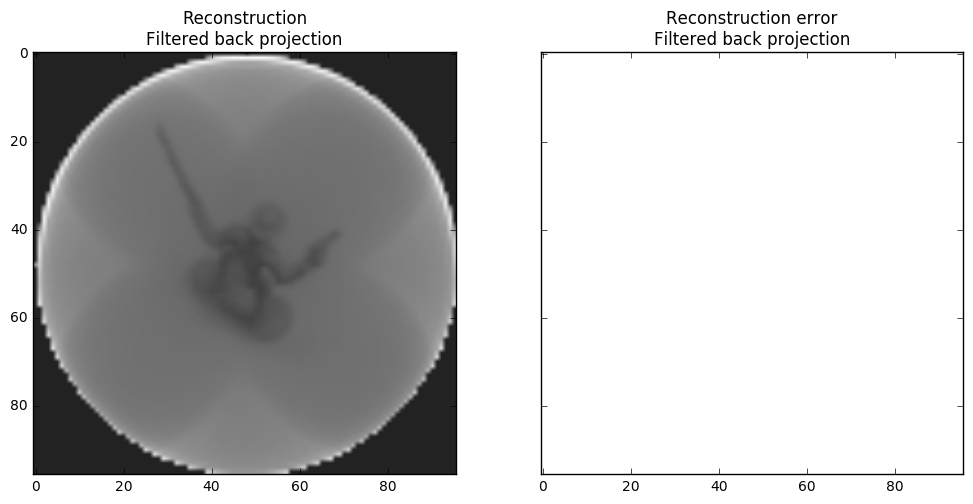

images/img_10020864.png


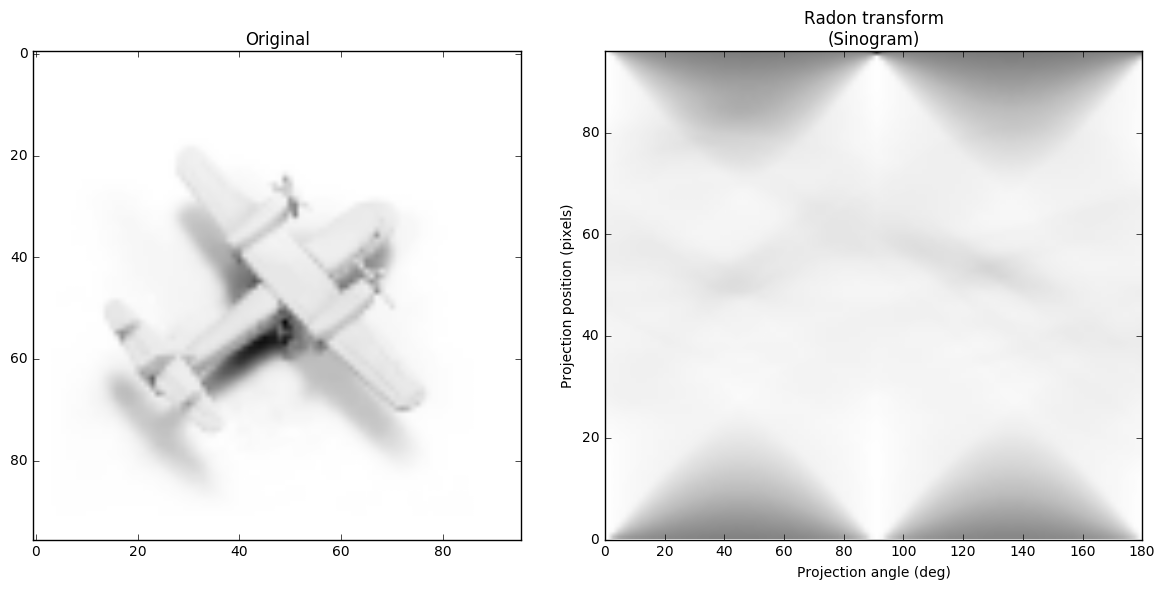

FBP rms reconstruction error: 135


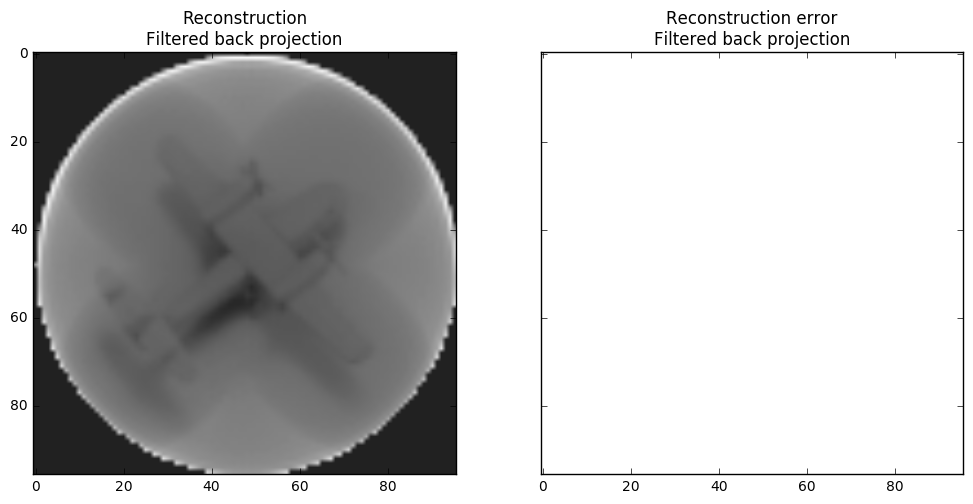

images/img_10023936.png


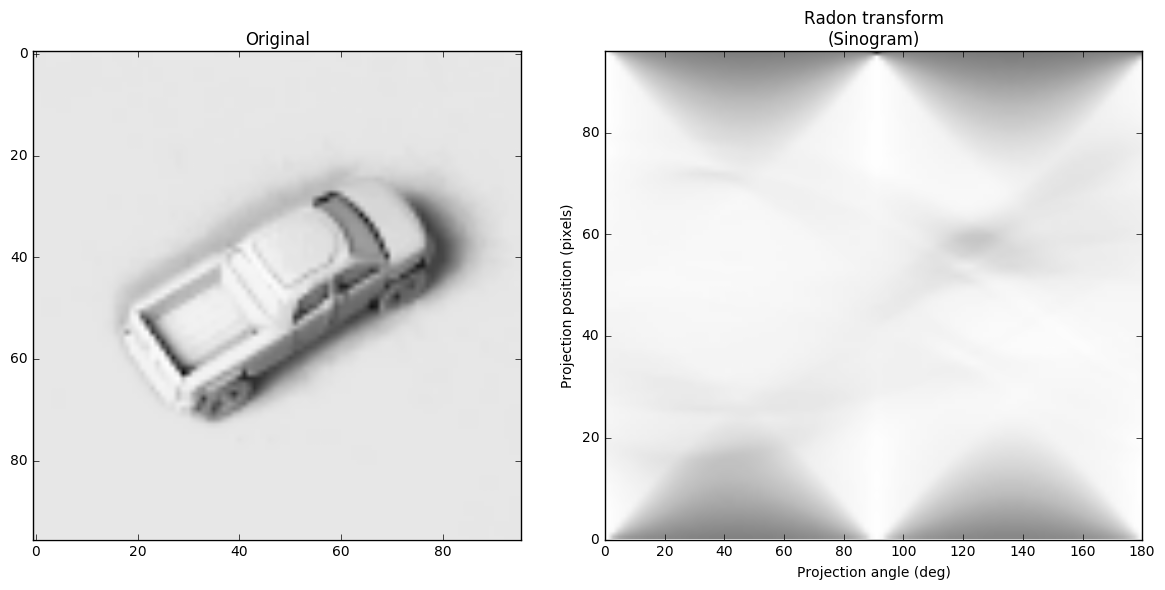

FBP rms reconstruction error: 67.8


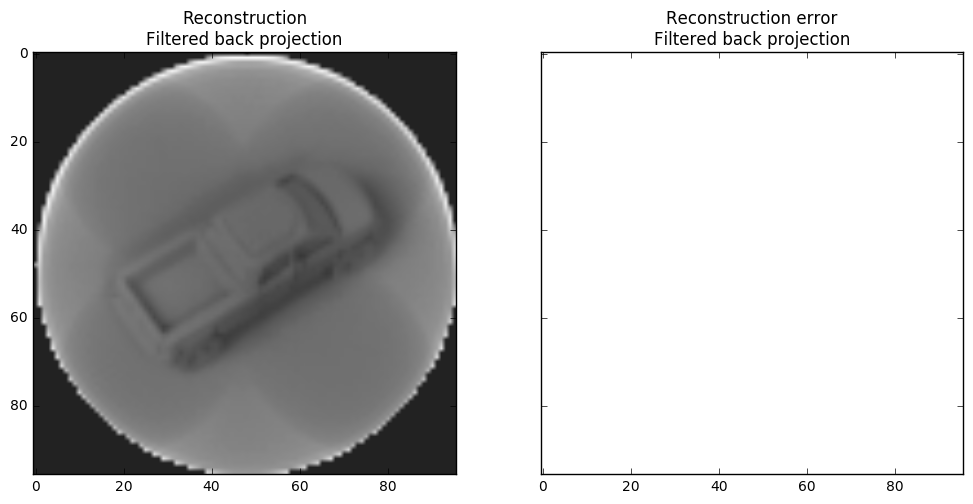

In [32]:
import os
import numpy as np

folder='images';
filesList = os.listdir(folder)
for file in filesList[1:10]:
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        fileForSinogram = folder+"/"+filename
        print(fileForSinogram)
        radtra(fileForSinogram)
        continue
    else:
        continue